# **Car Price Analysis**

* [Import Packages and Data](#import)
* [Prepare Data](#prepare)

## **Import Packages and Data** <a id='import'></a>

In [446]:
# Import packages
import math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
# User defined frequency table function
def freq_table(df, column):
    '''Takes a data frame and column name and returns a
    frequency table with count, percent, and cumulative percent
    as a pandas dataframe
    
    df: pandas.DataFrame object
    column: column name'''
    table = df[column].value_counts().reset_index()
    table['percent'] = (table['count'] / len(df)) * 100
    table['cumulative_percent'] = np.cumsum(table['percent'])
    
    return table

In [448]:
# Read in data
cars = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/car_data.csv')

In [449]:
# Print info
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [450]:
# Print sample of rows
display(cars.sample(10))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
156302,29/03/2016 11:54,3999,sedan,1993,auto,192,5er,100000,1,petrol,bmw,no,29/03/2016 00:00,0,70173,05/04/2016 21:45
106681,05/03/2016 14:38,0,NaN,1995,NaN,0,panda,150000,2,NaN,fiat,NaN,05/03/2016 00:00,0,49767,12/03/2016 17:16
53533,01/04/2016 21:45,14800,sedan,2013,auto,105,golf,80000,1,gasoline,volkswagen,no,01/04/2016 00:00,0,86929,05/04/2016 19:17
195740,29/03/2016 20:51,1300,small,1998,manual,54,seicento,150000,12,lpg,fiat,NaN,29/03/2016 00:00,0,66450,06/04/2016 07:17
275669,11/03/2016 22:56,950,NaN,2016,NaN,0,NaN,150000,0,petrol,opel,NaN,11/03/2016 00:00,0,26969,12/03/2016 19:15
184347,11/03/2016 09:56,2900,sedan,1998,manual,125,a6,150000,5,petrol,audi,no,11/03/2016 00:00,0,26871,13/03/2016 04:46
194877,25/03/2016 19:48,1450,bus,2003,manual,101,zafira,150000,12,gasoline,opel,no,25/03/2016 00:00,0,17491,07/04/2016 02:16
353269,29/03/2016 14:06,12250,suv,2007,auto,224,touareg,150000,6,gasoline,volkswagen,no,29/03/2016 00:00,0,60314,01/04/2016 17:47
50793,05/03/2016 20:58,18999,bus,2011,manual,140,sharan,60000,3,gasoline,volkswagen,no,05/03/2016 00:00,0,70469,05/04/2016 11:49
109471,03/04/2016 19:38,8249,small,2013,manual,86,i_reihe,30000,5,petrol,hyundai,no,03/04/2016 00:00,0,8248,05/04/2016 20:15


### Initial data observations

There are 354369 rows and 16 columns in the dataset. Some columns have missing values. All three date columns need to be changed to date time. Column names need to be converted to snake case.

## **Prepare Data** <a id='prepare'></a>

### Convert column names to snake case

In [451]:
# Convert columns from camel case to snake case
new_columns = []
for column in cars.columns:
    # regex to find capital letter that is not the first letter
    # and add underscore behind it
    column = re.sub('(?<!^)(?=[A-Z])', '_', column).lower()
    new_columns.append(column)

# Replace columns names with new names
cars.columns = new_columns

print('Column names (snake case):')
print()
print(cars.columns)

Column names (snake case):

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


Column names are converted to snake case.

### Change data types

In [452]:
# Convert date columns to datetime
columns = ['date_crawled', 'date_created', 'last_seen']

for col in columns:
    # convert to datetime using day first format
    cars[col] = pd.to_datetime(cars[col], dayfirst=True)

print('Data types:')
print(cars.dtypes)
print()
print('Data frame:')
display(cars.head())

Data types:
date_crawled          datetime64[ns]
price                          int64
vehicle_type                  object
registration_year              int64
gearbox                       object
power                          int64
model                         object
mileage                        int64
registration_month             int64
fuel_type                     object
brand                         object
not_repaired                  object
date_created          datetime64[ns]
number_of_pictures             int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

Data frame:


,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:00,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00


Date columns are converted to date time.

### Address missing values

In [453]:
# Print number and percent of missing values for each column
missing = cars.isna().sum().to_frame().rename(
    columns={0:'number'})
missing['proportion'] = (missing['number'] / len(cars)).round(2)

print('Missing values:')
display(missing)

Missing values:


,number,proportion
date_crawled,0,0.00
price,0,0.00
vehicle_type,37490,0.11
registration_year,0,0.00
gearbox,19833,0.06
power,0,0.00
model,19705,0.06
mileage,0,0.00
registration_month,0,0.00
fuel_type,32895,0.09


There are missing values in vehicle_type, gearbox, model, fuel_type, and not_repaired. All missing data are strings. The missing values will be replaced with 'unknown'.

In [454]:
# Replace missing strings with 'unknown'
columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']

cars[columns] = cars[columns].fillna('unknown')

# Re-calculate missing values
missing_new = cars.isna().sum().to_frame().rename(
    columns={0:'number'})
missing_new['proportion'] = (missing_new['number'] / len(cars)).round(2)

print('Updated missing values:')
display(missing_new)

Updated missing values:


,number,proportion
date_crawled,0,0.0
price,0,0.0
vehicle_type,0,0.0
registration_year,0,0.0
gearbox,0,0.0
power,0,0.0
model,0,0.0
mileage,0,0.0
registration_month,0,0.0
fuel_type,0,0.0


All missing strings have been filled with 'unknown'

### Check for duplicates

In [455]:
# Check for full duplicates
duplicates_num = cars.duplicated().sum()

print(f'Full duplicates: {duplicates_num}')

Full duplicates: 262


In [456]:
# View duplicates
duplicates = cars.duplicated(keep=False)

display(cars[duplicates].sort_values(by='date_crawled'))

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
136532,2016-03-05 14:11:00,3700,coupe,2006,manual,101,astra,150000,7,gasoline,opel,no,2016-03-03,0,55218,2016-03-06 03:44:00
238082,2016-03-05 14:11:00,3700,coupe,2006,manual,101,astra,150000,7,gasoline,opel,no,2016-03-03,0,55218,2016-03-06 03:44:00
51617,2016-03-05 14:12:00,2689,small,2005,auto,61,fortwo,90000,7,petrol,smart,no,2016-03-03,0,56412,2016-04-05 04:49:00
53329,2016-03-05 14:12:00,2689,small,2005,auto,61,fortwo,90000,7,petrol,smart,no,2016-03-03,0,56412,2016-04-05 04:49:00
234836,2016-03-05 14:13:00,17000,wagon,2009,manual,170,a4,150000,9,gasoline,audi,no,2016-03-03,0,35792,2016-04-07 03:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309829,2016-04-06 20:06:00,9890,wagon,2007,auto,136,c_klasse,150000,12,gasoline,mercedes_benz,no,2016-04-06,0,65760,2016-04-06 20:06:00
53426,2016-04-06 21:25:00,3900,sedan,1999,manual,116,beetle,150000,6,petrol,volkswagen,no,2016-04-06,0,55469,2016-04-06 21:25:00
1771,2016-04-06 21:25:00,3900,sedan,1999,manual,116,beetle,150000,6,petrol,volkswagen,no,2016-04-06,0,55469,2016-04-06 21:25:00
50917,2016-04-06 23:25:00,2990,small,2002,manual,60,lupo,80000,8,petrol,volkswagen,no,2016-04-06,0,61250,2016-04-06 23:25:00


There do appear to be duplicate entries in the dataset, with the same cars entered twice, down to the minute of the date the profile was downloaded and the time of the last activity of the user. These duplicates will be deleted from the dataset.

In [457]:
# Delete duplicate entries
cars = cars.drop_duplicates()

duplicates_new = cars.duplicated().sum()

print(f'Updated duplicates: {duplicates_new}')

Updated duplicates: 0


Duplicates have been deleted from the dataframe.

### Check quantitative variables

In [458]:
# Descriptive statistics of quantitative variables
cols_numeric = ['price', 'registration_year', 'power', 'mileage', 'registration_month', 'number_of_pictures']

cars[cols_numeric].describe().round(2)

,price,registration_year,power,mileage,registration_month,number_of_pictures
count,354107.00,354107.00,354107.00,354107.00,354107.00,354107.0
mean,4416.43,2004.24,110.09,128211.81,5.71,0.0
std,4514.34,90.26,189.91,37906.59,3.73,0.0
min,0.00,1000.00,0.00,5000.00,0.00,0.0
25%,1050.00,1999.00,69.00,125000.00,3.00,0.0
50%,2700.00,2003.00,105.00,150000.00,6.00,0.0
75%,6400.00,2008.00,143.00,150000.00,9.00,0.0
max,20000.00,9999.00,20000.00,150000.00,12.00,0.0


There are incorrect values for registration_year, power, and number_of_pictures. Registration_year should not be less than 1900 or more than 2023. Power should not be less than 1 or more than 2000. Values outside those ranges will be cleaned from the dataset. All cars have 0 pictures, so this variable will be left out of the analysis.

In [459]:
# Print values of registriation year
print('Frequency table of registration_year:')
print(cars['registration_year'].value_counts().reset_index().sort_values(by='registration_year').to_string())

Frequency table of registration_year:
     registration_year  count
60                1000     37
148               1001      1
111               1039      1
92                1111      3
139               1200      1
84                1234      4
128               1253      1
142               1255      1
102               1300      2
129               1400      1
78                1500      5
110               1600      2
119               1602      1
140               1688      1
79                1800      5
53                1910    101
117               1915      1
126               1919      1
118               1920      1
101               1923      2
130               1925      1
124               1927      1
104               1928      2
77                1929      7
89                1930      3
116               1931      1
87                1932      3
88                1933      3
96                1934      3
85                1935      4
94                1936      3
72

In [460]:
# Replace registrations years < 1900 and > 2023 with nan
def reg_year_bound(x):
    if x < 1900:
        return np.nan
    elif x > 2023:
        return np.nan
    else:
        return x

# apply year function
cars['registration_year'] = cars['registration_year'].apply(reg_year_bound)

print('Updated registration_year statistics')
print(cars['registration_year'].describe().round(2))

Updated registration_year statistics
count    353936.00
mean       2003.08
std           7.54
min        1910.00
25%        1999.00
50%        2003.00
75%        2008.00
max        2019.00
Name: registration_year, dtype: float64


In [461]:
# Print values for power
freq_power = freq_table(cars, 'power')

print('Frequency table for power:')
print(freq_power[['power', 'count', 'percent']].sort_values(by='power').to_string())

Frequency table for power:
     power  count    percent
0        0  40218  11.357584
228      1     34   0.009602
305      2     10   0.002824
309      3      9   0.002542
241      4     30   0.008472
162      5    103   0.029087
293      6     11   0.003106
290      7     11   0.003106
327      8      7   0.001977
343      9      5   0.001412
271     10     15   0.004236
243     11     28   0.007907
257     12     22   0.006213
318     13      8   0.002259
264     14     20   0.005648
260     15     20   0.005648
292     16     11   0.003106
316     17      8   0.002259
201     18     51   0.014402
278     19     14   0.003954
254     20     22   0.006213
334     21      6   0.001694
351     22      5   0.001412
209     23     44   0.012426
242     24     29   0.008190
268     25     16   0.004518
109     26    291   0.082179
221     27     38   0.010731
359     28      5   0.001412
225     29     35   0.009884
232     30     33   0.009319
308     31      9   0.002542
349     32      

In [462]:
# Replace power below 1 and above 2200 with nan
def power_bound(x):
    if x < 1:
        return np.nan
    elif x > 2000:
        return np.nan
    else:
        return x
    
# apply function
cars['power'] = cars['power'].apply(power_bound)

print('Updated power statistics:')
cars['power'].describe()

Updated power statistics:


count    313769.000000
mean        121.084734
std          64.298036
min           1.000000
25%          75.000000
50%         110.000000
75%         150.000000
max        2000.000000
Name: power, dtype: float64

In [463]:
# Re-assess missing values
missing_new = cars.isna().sum().to_frame().rename(columns={0:'count'})
missing_new['proportion'] = (missing_new / len(cars)).round(2)

display(missing_new)

,count,proportion
date_crawled,0,0.00
price,0,0.00
vehicle_type,0,0.00
registration_year,171,0.00
gearbox,0,0.00
power,40338,0.11
model,0,0.00
mileage,0,0.00
registration_month,0,0.00
fuel_type,0,0.00


Registration_year and power are both missing around 10% of data or less. Their values can be imputed with mean or median, depending on the shape of the distribution.

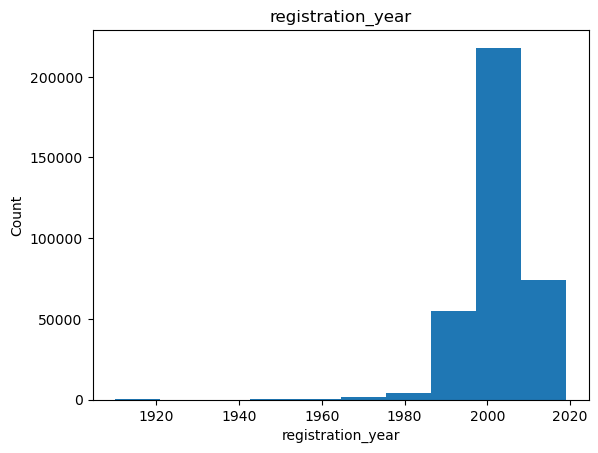

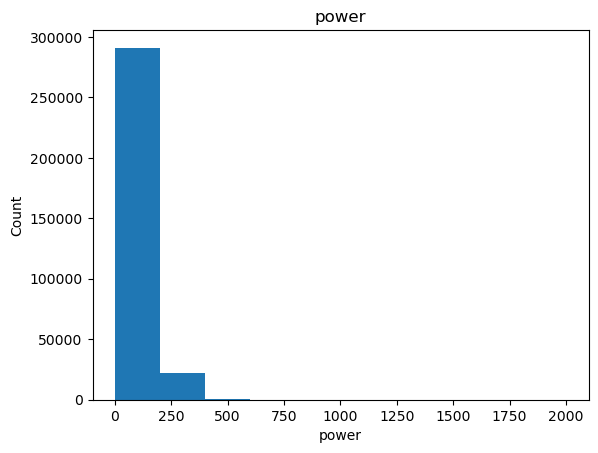

In [464]:
# Display histograms for registration_year and power
cols_missing = ['registration_year', 'power']

for col in cols_missing:
    plt.hist(cars[col])
    plt.title(f'{col}')
    plt.ylabel('Count')
    plt.xlabel(f'{col}')
    plt.show()

Registration year and power are both highly skewed. Missing values will be imputed with the median.

In [465]:
# Impute missing values in registration_year and power with median 
for col in cols_missing:
    cars[col] = cars[col].fillna(cars[col].median())
    
# Re-print missing values
missing_new_2 = cars.isna().sum().to_frame().rename(columns={0:'count'})
missing_new_2['proportion'] = (missing_new_2 / len(cars)).round(2)

display(missing_new_2)

,count,proportion
date_crawled,0,0.0
price,0,0.0
vehicle_type,0,0.0
registration_year,0,0.0
gearbox,0,0.0
power,0,0.0
model,0,0.0
mileage,0,0.0
registration_month,0,0.0
fuel_type,0,0.0


All missing values have been filled.

In [466]:
# Re-print summary statistics
display(cars[cols_numeric].describe())

,price,registration_year,power,mileage,registration_month,number_of_pictures
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0
mean,4416.433287,2003.084805,119.822020,128211.811684,5.714182,0.0
std,4514.338584,7.535511,60.627453,37906.590101,3.726682,0.0
min,0.000000,1910.000000,1.000000,5000.000000,0.000000,0.0
25%,1050.000000,1999.000000,84.000000,125000.000000,3.000000,0.0
50%,2700.000000,2003.000000,110.000000,150000.000000,6.000000,0.0
75%,6400.000000,2008.000000,142.000000,150000.000000,9.000000,0.0
max,20000.000000,2019.000000,2000.000000,150000.000000,12.000000,0.0


All numeric columns now have reasonable ranges.

### Prepare data conclusions

Dates are changed to datetime, missing values filled with 'unknown', and duplicates cleaned from the dataset. The data is ready for analysis.

## **EDA**

### Categorical features

In [467]:
# Frequency tables of string variables

# Apply function to each string variable
freq_vehicle = freq_table(cars, 'vehicle_type')
freq_gear = freq_table(cars, 'gearbox')
freq_model = freq_table(cars, 'model')
freq_fuel = freq_table(cars, 'fuel_type')
freq_brand = freq_table(cars, 'brand')
freq_repair = freq_table(cars, 'not_repaired')
freq_postal = freq_table(cars, 'postal_code')

# Display tables
display(freq_vehicle)
display(freq_gear)
display(freq_model)
display(freq_fuel)
display(freq_brand)
display(freq_repair)
display(freq_postal)

,vehicle_type,count,percent,cumulative_percent
0,sedan,91399,25.811125,25.811125
1,small,79753,22.522288,48.333413
2,wagon,65115,18.388510,66.721923
3,unknown,37484,10.585501,77.307424
4,bus,28752,8.119580,85.427004
5,convertible,20180,5.698842,91.125846
6,coupe,16147,4.559921,95.685767
7,suv,11991,3.386265,99.072032
8,other,3286,0.927968,100.000000


,gearbox,count,percent,cumulative_percent
0,manual,268034,75.692940,75.692940
1,auto,66243,18.707057,94.399998
2,unknown,19830,5.600002,100.000000


,model,count,percent,cumulative_percent
0,golf,29215,8.250331,8.250331
1,other,24402,6.891137,15.141469
2,3er,19744,5.575716,20.717184
3,unknown,19701,5.563573,26.280757
4,polo,13057,3.687304,29.968061
...,...,...,...,...
246,i3,8,0.002259,99.996611
247,serie_3,4,0.001130,99.997741
248,rangerover,4,0.001130,99.998870
249,range_rover_evoque,2,0.000565,99.999435


,fuel_type,count,percent,cumulative_percent
0,petrol,216161,61.043978,61.043978
1,gasoline,98658,27.861070,88.905048
2,unknown,32889,9.287871,98.192919
3,lpg,5307,1.498700,99.691619
4,cng,565,0.159556,99.851175
5,hybrid,233,0.065799,99.916974
6,other,204,0.057610,99.974584
7,electric,90,0.025416,100.000000


,brand,count,percent,cumulative_percent
0,volkswagen,76960,21.733544,21.733544
1,opel,39902,11.268345,33.001889
2,bmw,36881,10.415213,43.417103
3,mercedes_benz,32025,9.043877,52.460979
4,audi,29439,8.313589,60.774568
5,ford,25163,7.106044,67.880612
6,renault,17915,5.059205,72.939818
7,peugeot,10988,3.103017,76.042835
8,fiat,9634,2.720647,78.763481
9,seat,6901,1.948846,80.712327


,not_repaired,count,percent,cumulative_percent
0,no,246927,69.732313,69.732313
1,unknown,71145,20.091385,89.823697
2,yes,36035,10.176303,100.000000


,postal_code,count,percent,cumulative_percent
0,10115,819,0.231286,0.231286
1,65428,611,0.172547,0.403833
2,66333,343,0.096863,0.500696
3,44145,316,0.089239,0.589935
4,32257,316,0.089239,0.679173
...,...,...,...,...
8138,91801,1,0.000282,99.998870
8139,31097,1,0.000282,99.999153
8140,82444,1,0.000282,99.999435
8141,94359,1,0.000282,99.999718


Vehicle_type, gearbox, fuel_type, and not_reparied all have under 10 categories. They will be one-hot encoded as is. Model, brand, and postal_code all have over 20 categories. Further exploration of these variables is needed to determine if categories can be reduced.

Geographical regions are determined by the first 3 numbers in a postal code. Postal codes will be truncated to first 3 numbers to reduce number of categories while keeping region information.

In [468]:
# Truncate postal code to first 3 numbers
def trunc_hundred(x):
    return math.trunc(x / 100) * 100

cars['postal_code_trunc'] = cars['postal_code'].apply(trunc_hundred)

def trunc_thous(x):
    return math.trunc(x / 1000) * 1000

cars['postal_code_trunc_1000'] = cars['postal_code'].apply(trunc_thous)

display(cars.head())

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,postal_code_trunc,postal_code_trunc_1000
0,2016-03-24 11:52:00,480,unknown,1993.0,manual,110.0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:00,70400,70000
1,2016-03-24 10:58:00,18300,coupe,2011.0,manual,190.0,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00,66900,66000
2,2016-03-14 12:52:00,9800,suv,2004.0,auto,163.0,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:00,90400,90000
3,2016-03-17 16:54:00,1500,small,2001.0,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00,91000,91000
4,2016-03-31 17:25:00,3600,small,2008.0,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00,60400,60000


In [469]:
# Re-calculate postal_code freq table
freq_postal_trunc = freq_table(cars, 'postal_code_trunc')

freq_postal_trunc_1000 = freq_table(cars, 'postal_code_trunc_1000')


display(freq_postal_trunc)
display(freq_postal_trunc_1000)

,postal_code_trunc,count,percent,cumulative_percent
0,90400,2095,0.591629,0.591629
1,45800,1849,0.522159,1.113788
2,60300,1592,0.449582,1.563369
3,38100,1479,0.417670,1.981040
4,26600,1451,0.409763,2.390803
...,...,...,...,...
666,24400,30,0.008472,99.978820
667,88700,23,0.006495,99.985315
668,18600,18,0.005083,99.990398
669,25600,17,0.004801,99.995199


,postal_code_trunc_1000,count,percent,cumulative_percent
0,45000,8366,2.362563,2.362563
1,26000,7725,2.181544,4.544107
2,66000,7188,2.029895,6.574002
3,65000,7024,1.983581,8.557583
4,44000,6508,1.837863,10.395445
...,...,...,...,...
90,69000,1371,0.387171,98.920948
91,2000,1145,0.323349,99.244296
92,98000,973,0.274776,99.519072
93,20000,897,0.253313,99.772385


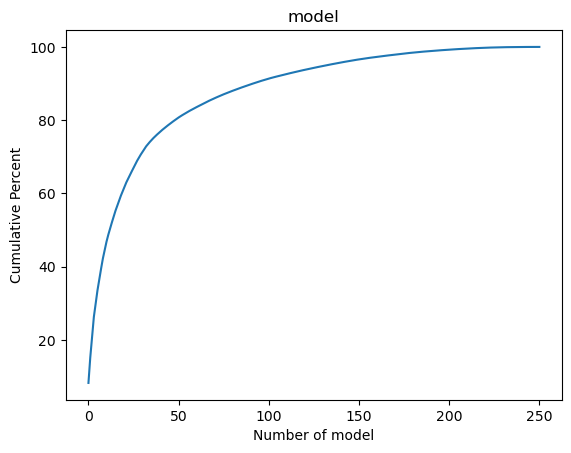

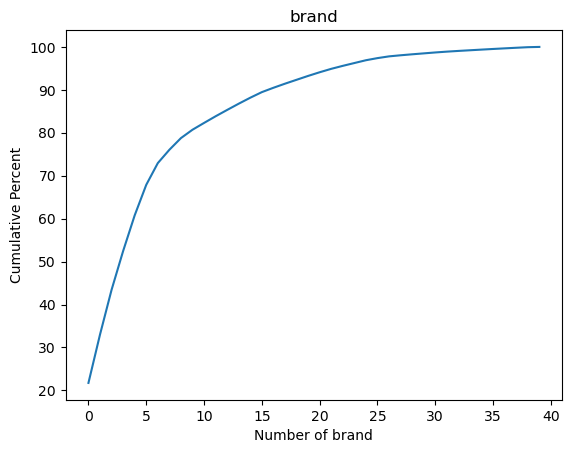

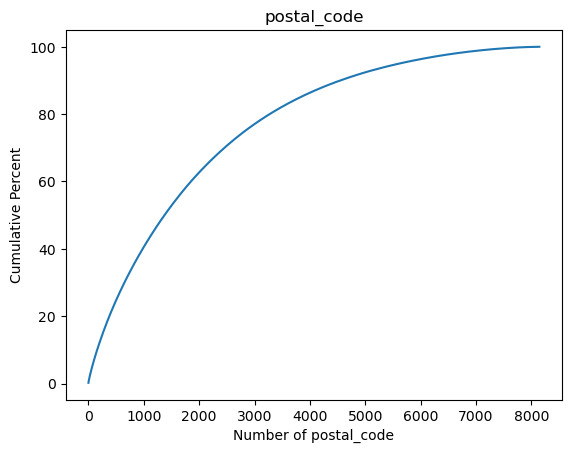

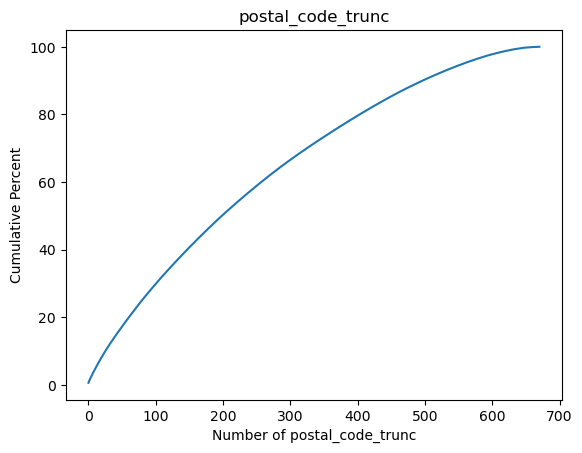

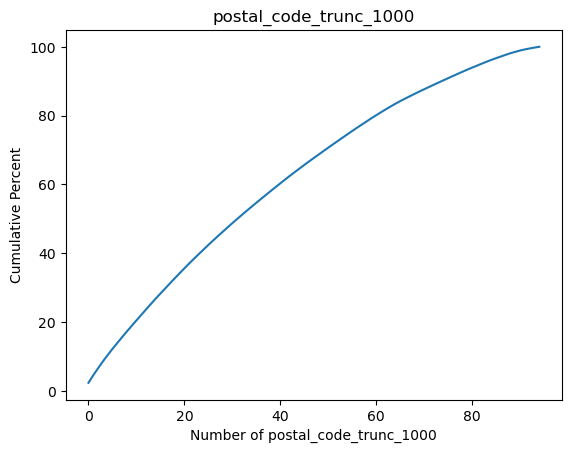

In [470]:
# plot pdf and cdf of model, brand, and postal_code
freq_large = [freq_model, freq_brand, freq_postal, freq_postal_trunc, freq_postal_trunc_1000]

for freq_table in freq_large:
    plt.plot(freq_table['cumulative_percent'])
    plt.title(f'{freq_table.columns[0]}')
    plt.ylabel('Cumulative Percent')
    plt.xlabel(f'Number of {freq_table.columns[0]}')
    plt.show()

### Quantitative features

<Axes: xlabel='price', ylabel='Density'>

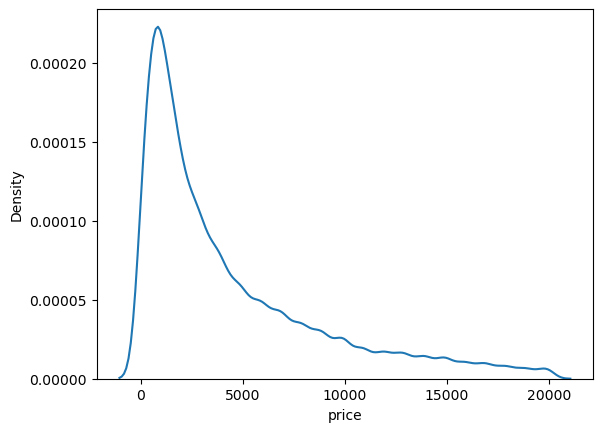

In [471]:
sns.kdeplot(cars['price'])

<Axes: xlabel='price', ylabel='Density'>

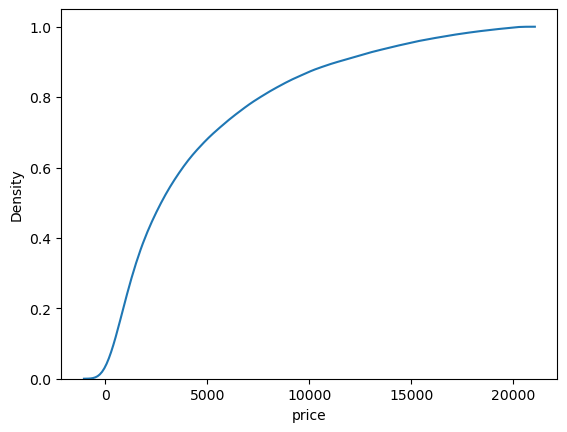

In [472]:
sns.kdeplot(cars['price'], cumulative=True)

/Users/kellyshreeve/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


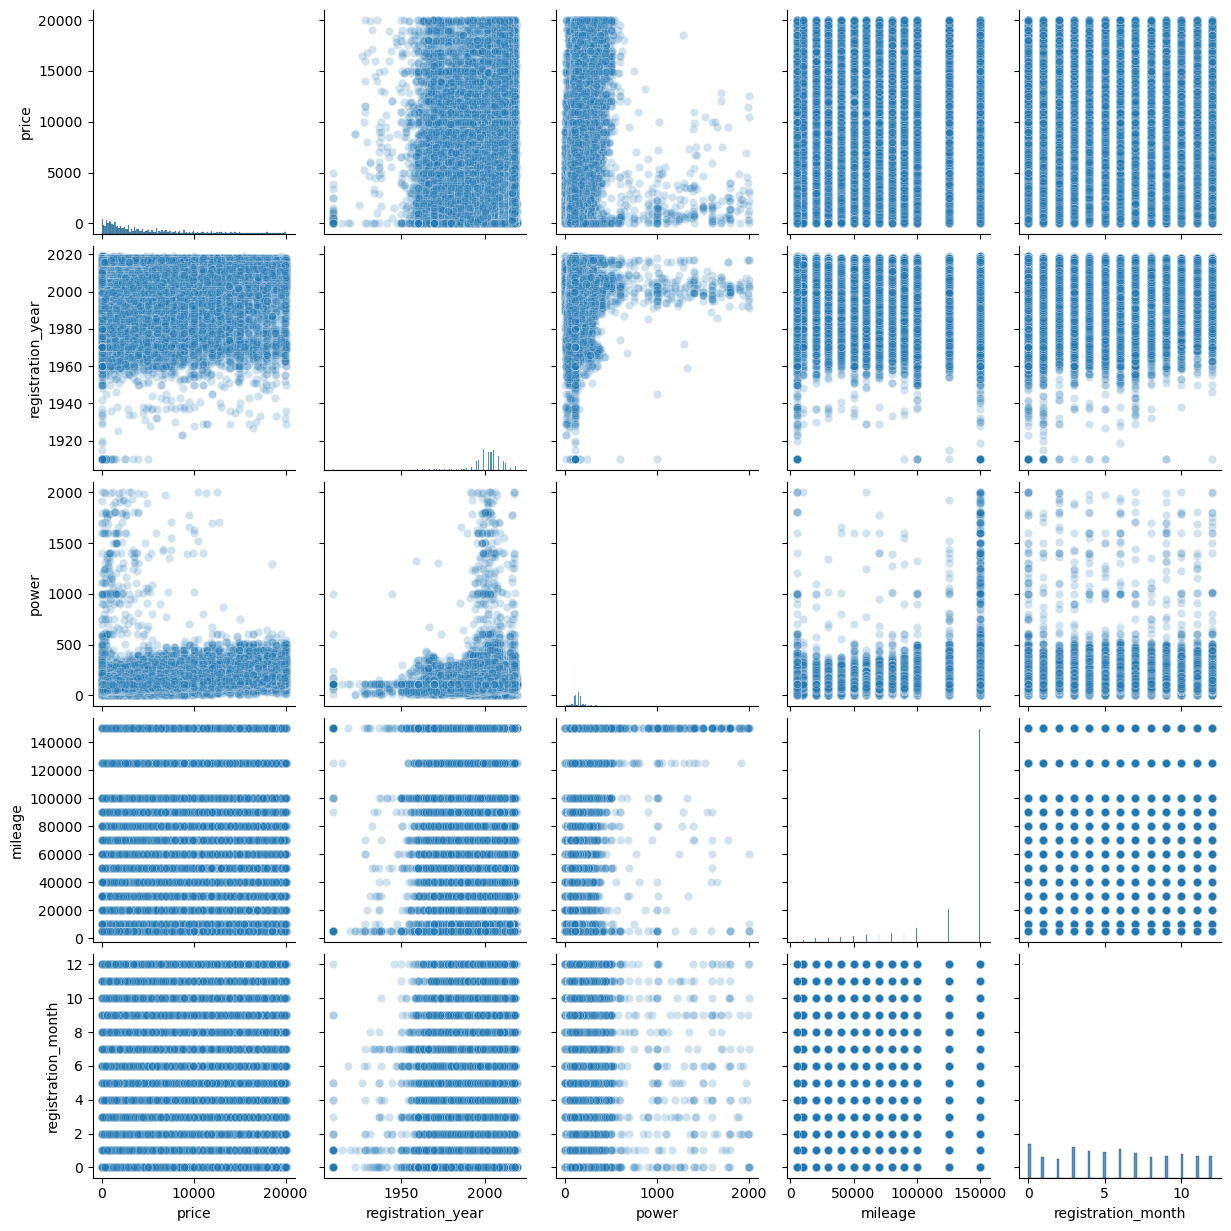

In [473]:
cols_numeric = ['price', 'registration_year', 'power', 'mileage', 'registration_month']
sns.pairplot(cars[cols_numeric], plot_kws={'alpha':0.2})

There are no clear assiciations between price and registriation_year, power, mileage, or registration_month.

<Axes: >

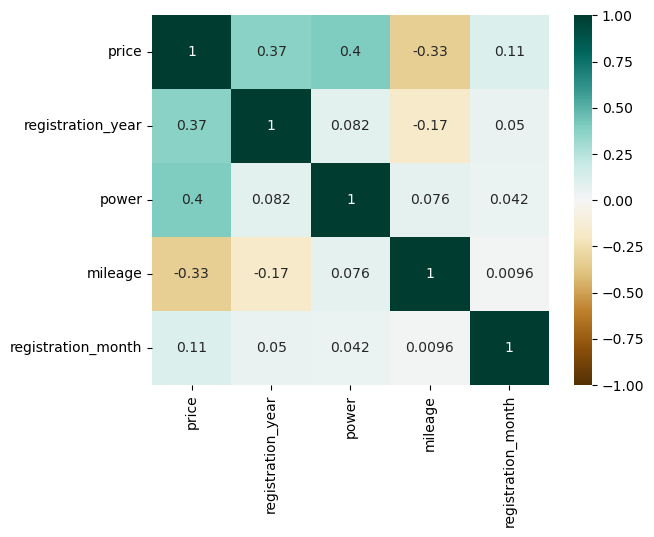

In [481]:
sns.heatmap(cars[cols_numeric].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## **Models**